# Datenvisualisierung: Lernkontrolle 1
20 Punkte pro Diagramm. <br>
Insgesamt maximal 100 Punkte.

In [2]:
# Deine Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import ylabel, title, xlabel, figure

In [3]:
sns.set_style("whitegrid")

In [3]:
# Datensatz laden:
data = pd.read_csv("restaurant.csv")
data

,Unnamed: 0,year_month,date,datetime,payment,total,tip,meal_name,type
0,0,2024-03,2024-03-01,2024-03-01 10:15:50.520,card,39.41,4.09,Grilled Steak,Meat Dish
1,1,2024-03,2024-03-01,2024-03-01 12:19:22.539,card,39.04,4.10,Vegetable Lasagna,Vegetarian Dish
2,2,2024-03,2024-03-01,2024-03-01 12:20:18.089,card,39.21,5.65,Vegetable Lasagna,Vegetarian Dish
3,3,2024-03,2024-03-01,2024-03-01 13:46:33.006,card,29.44,3.79,Grilled Salmon,Fish Dish
4,4,2024-03,2024-03-01,2024-03-01 13:48:14.626,card,39.94,1.98,Grilled Steak,Meat Dish
...,...,...,...,...,...,...,...,...,...
3066,3066,2025-02,2025-02-12,2025-02-12 17:05:31.989,card,36.37,4.42,Pork Chops,Meat Dish
3067,3067,2025-02,2025-02-12,2025-02-12 17:42:51.484,card,26.51,2.77,Grilled Salmon,Fish Dish
3068,3068,2025-02,2025-02-12,2025-02-12 20:05:40.740,card,36.46,3.84,Grilled Steak,Meat Dish
3069,3069,2025-02,2025-02-12,2025-02-12 20:23:13.374,card,36.53,1.95,Quinoa Salad,Vegetarian Dish


# Aufgabe 1
Bilde folgendes Diagramm nach:
![lineplot_bild](1_lineplot.png)

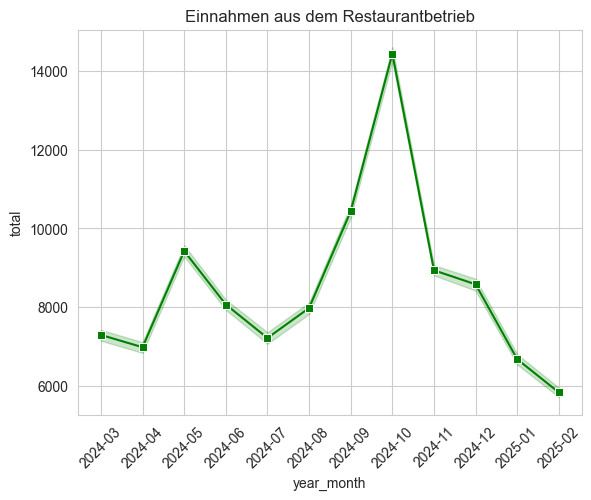

In [4]:
plt.figure(figsize=(6.5, 5))

l_chart = sns.lineplot(
	data,
	x="year_month",
	y="total",
	estimator="sum",
	color="green",
	marker="s",
	markerfacecolor="green",
	markersize=6,
)

l_chart.tick_params('x', labelrotation=45)
l_chart.set(title="Einnahmen aus dem Restaurantbetrieb");

# Haben wir nicht im Unterricht genutzt, deswegen ein kleines Code-Geschenk:
# ax.tick_params('x', labelrotation=45)

# Aufgabe 2
Bilde folgendes Diagramm nach:
![barplot_bild](2_barplot.png)

In [5]:
meals_groupby = data.groupby("meal_name")["total"].sum()
meals_groupby = pd.DataFrame(meals_groupby)
meals_groupby

,total
meal_name,
Beef Stir-Fry,7845.79
Grilled Salmon,10919.29
Grilled Steak,25662.68
Pork Chops,15922.63
Quinoa Salad,6879.58
Roast Chicken,23141.92
Tuna Steak,2486.22
Vegetable Lasagna,8965.93


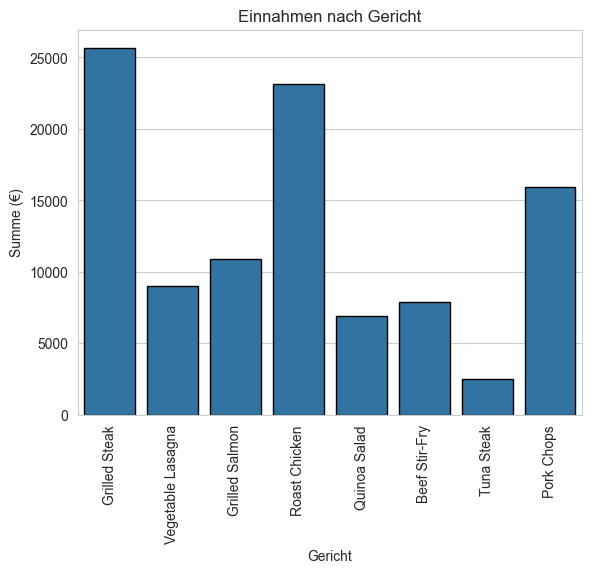

In [6]:
plt.figure(figsize=(6.5, 5))

b_chart = sns.barplot(
	meals_groupby,
	x="meal_name",
	y="total",
	ec="black",
	lw=1,
	order=[
		"Grilled Steak",
		"Vegetable Lasagna",
		"Grilled Salmon",
		"Roast Chicken",
		"Quinoa Salad",
		"Beef Stir-Fry",
		"Tuna Steak",
		"Pork Chops"
	],
)

b_chart.tick_params('x', labelrotation=90)
b_chart.set(
	title="Einnahmen nach Gericht",
	xlabel="Gericht",
	ylabel="Summe (€)"
);

# Haben wir nicht im Unterricht genutzt, deswegen ein kleines Code-Geschenk:
# ax.tick_params('x', labelrotation=90)

# Aufgabe 3
Bilde folgendes Diagramm nach:
![piechart_bild](3_piechart.png)

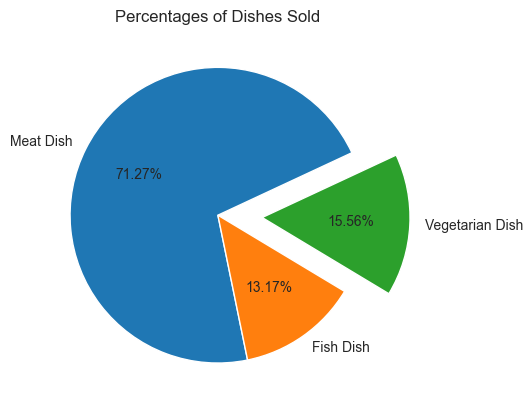

In [7]:
pct_per_dishtype = data.groupby("type", as_index=False, observed=False)["total"].sum()
order = ["Meat Dish", "Fish Dish", "Vegetarian Dish"]
pct_per_dishtype = pct_per_dishtype.set_index("type").reindex(order).reset_index()

wedges, texts, autotexts = plt.pie(
	pct_per_dishtype["total"],
	labels=["Meat Dish", "Fish Dish", "Vegetarian Dish"],
	autopct="%.2f%%",
	startangle=25,
	pctdistance=0.6,
	wedgeprops={"edgecolor": "white"},
	explode=[0.0, 0.0, 0.3]
)

plt.title("Percentages of Dishes Sold");

# Aufgabe 4
Bilde folgendes Diagramm nach:
![histplot_bild](4_histplot.png)

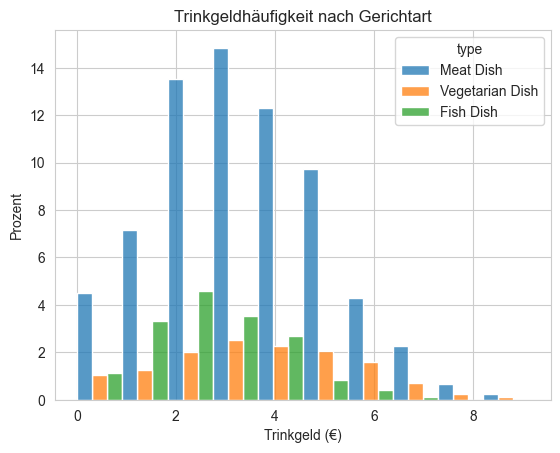

In [8]:
tip_histo = sns.histplot(
	data,
	x="tip",
	hue="type",
	bins=10,
	multiple="dodge",
	stat="percent",
)

tip_histo.set(
	title="Trinkgeldhäufigkeit nach Gerichtart",
	xlabel="Trinkgeld (€)",
	ylabel="Prozent"
);

# Aufgabe 5
Bilde folgendes Diagramm nach:
![scatterplot_bild](5_scatterplot.png)

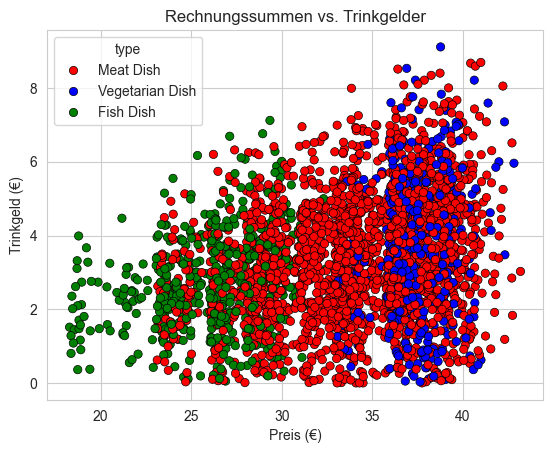

In [9]:
sc_plot = sns.scatterplot(
	data,
	x='total',
	y='tip',
	hue='type',
	palette={"Meat Dish": "r", "Fish Dish": "g", "Vegetarian Dish": "b"},
	ec="black",
)

sc_plot.set(
	title="Rechnungssummen vs. Trinkgelder",
	xlabel="Preis (€)",
	ylabel="Trinkgeld (€)"
);

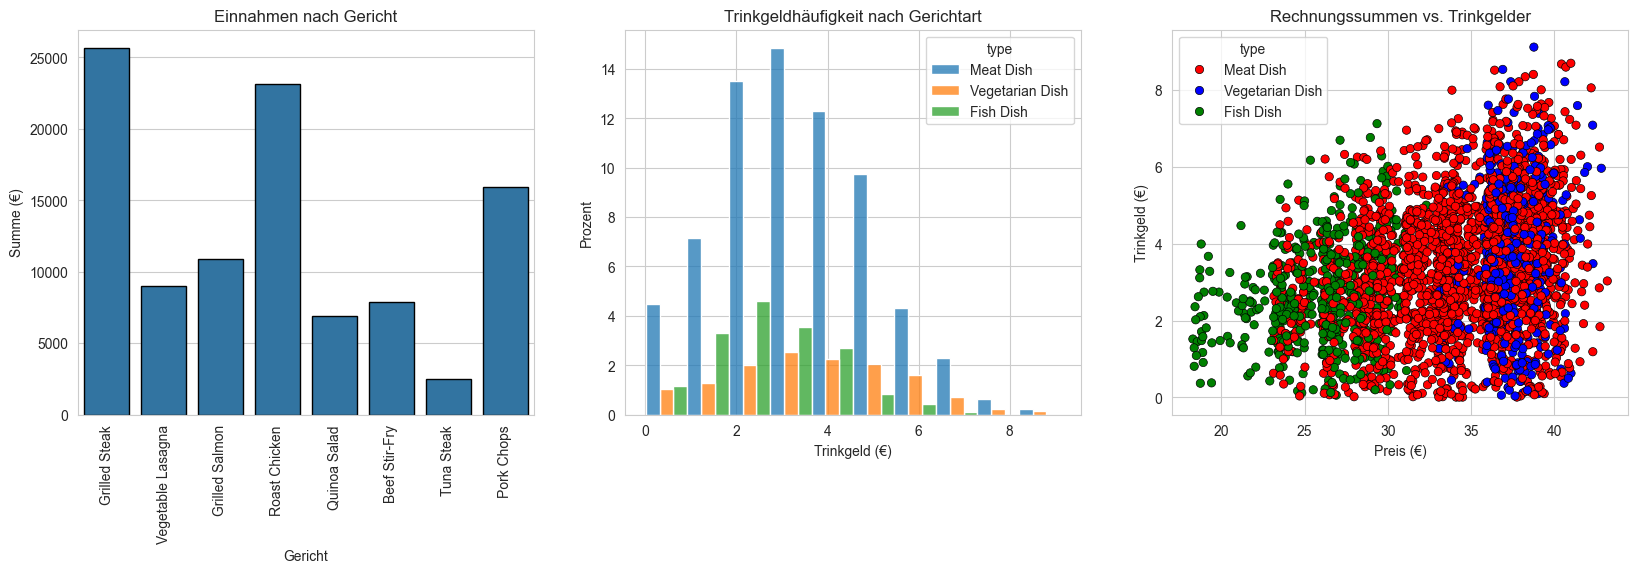

In [12]:
# just 4 fun
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20, 5))

# ax1
sns.barplot(
	meals_groupby,
	x="meal_name",
	y="total",
	ec="black",
	lw=1,
	order=["Grilled Steak",
		   "Vegetable Lasagna",
		   "Grilled Salmon", "Roast Chicken",
		   "Quinoa Salad", "Beef Stir-Fry",
		   "Tuna Steak", "Pork Chops"],
	ax=ax1,
)

ax1.tick_params('x', labelrotation=90)

ax1.set(title="Einnahmen nach Gericht",
		xlabel="Gericht",
		ylabel="Summe (€)");

# ax2
sns.histplot(
	data,
	x="tip",
	hue="type",
	bins=10,
	multiple="dodge",
	stat="percent",
	ax=ax2
)

ax2.set(title="Trinkgeldhäufigkeit nach Gerichtart",
		xlabel="Trinkgeld (€)",
		ylabel="Prozent");

# ax3
sns.scatterplot(
	data,
	x='total',
	y='tip',
	hue='type',
	palette={"Meat Dish": "r", "Fish Dish": "g", "Vegetarian Dish": "b"},
	ec="black",
	ax=ax3,
)

ax3.set(title="Rechnungssummen vs. Trinkgelder",
		xlabel="Preis (€)",
		ylabel="Trinkgeld (€)");